In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix



In [36]:
df=pd.read_csv('/kaggle/input/emgsen/emg_dataset.csv')

In [37]:
df

,biceps,triceps,middle,label
0,1023.0,1023,1023,elbow_bend
1,0.0,0,0,elbow_bend
2,1023.0,1023,1023,elbow_bend
3,0.0,0,0,elbow_bend
4,944.0,442,65,elbow_bend
...,...,...,...,...
11590,745.0,737,681,hand_close
11591,1023.0,1023,1023,hand_close
11592,10.0,0,0,hand_close
11593,0.0,0,0,hand_close


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11595 entries, 0 to 11594
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   biceps   11406 non-null  float64
 1   triceps  11595 non-null  int64  
 2   middle   11595 non-null  int64  
 3   label    11595 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 362.5+ KB


In [39]:
df.shape


(11595, 4)

In [40]:
df.isna().sum()

biceps     189
triceps      0
middle       0
label        0
dtype: int64

In [41]:
df.duplicated().sum()

9109

In [42]:
df.drop_duplicates(inplace=True)


In [43]:
import pandas as pd
from sklearn.impute import KNNImputer


knn_data = df[['biceps']]  # 

imputer = KNNImputer(n_neighbors=5)

df[['biceps']] = imputer.fit_transform(knn_data)


In [44]:
df.isna().sum()

biceps     0
triceps    0
middle     0
label      0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df.shape

(2486, 4)

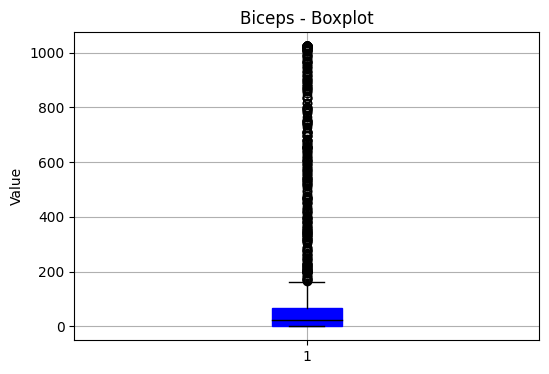

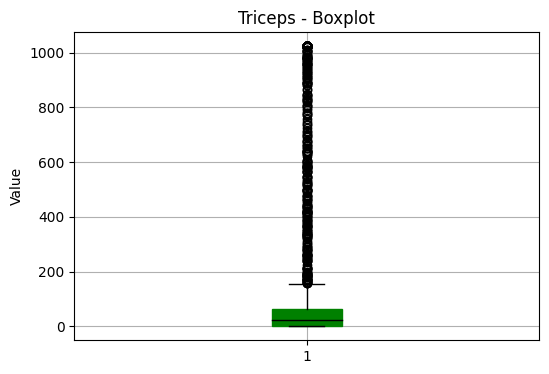

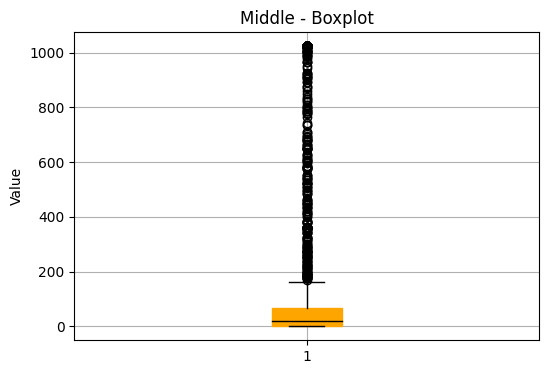

In [47]:
columns = ['biceps', 'triceps', 'middle']
colors = ['blue', 'green', 'orange']

for col, color in zip(columns, colors):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), patch_artist=True,
                boxprops=dict(facecolor=color, color=color),
                medianprops=dict(color='black'))
    plt.title(f'{col.capitalize()} - Boxplot')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


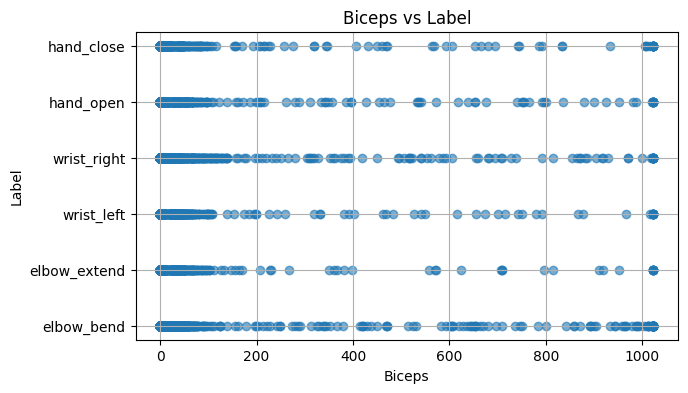

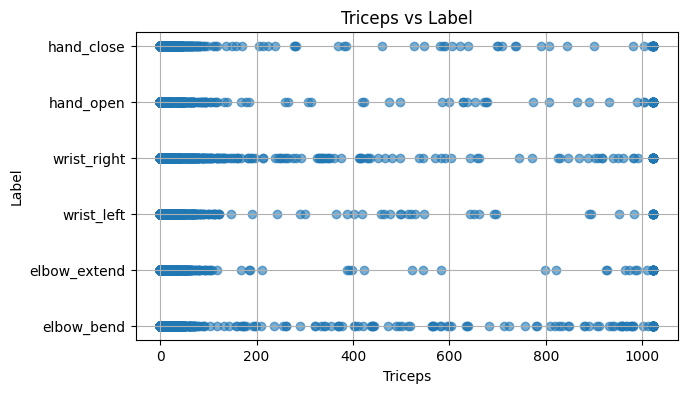

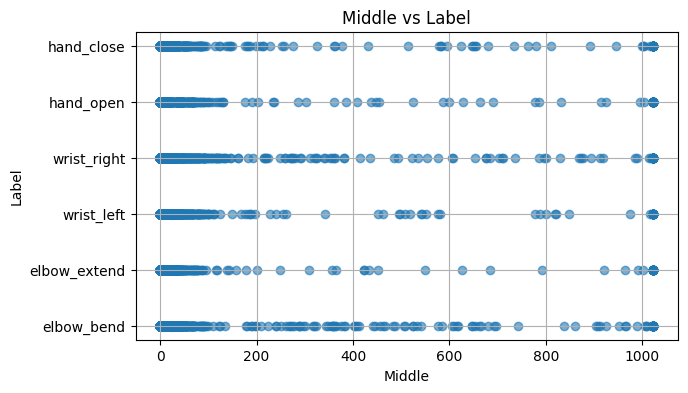

In [48]:
import matplotlib.pyplot as plt

columns = ['biceps', 'triceps', 'middle']
target = 'label'

for col in columns:
    plt.figure(figsize=(7, 4))
    plt.scatter(df[col], df[target], alpha=0.6)
    plt.title(f'{col.capitalize()} vs {target.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel(target.capitalize())
    plt.grid(True)
    plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler

# الأعمدة اللي هنعمل لها Standardization
columns = ['biceps', 'triceps', 'middle']

# إنشاء نسخة من البيانات علشان منغيرش الأصلية
df_standardized = df.copy()

# إنشاء StandardScaler
scaler = StandardScaler()

# تطبيق الـ scaling
df_standardized[columns] = scaler.fit_transform(df[columns])

df_standardized[columns].head()


,biceps,triceps,middle
0,3.438778,3.235120,3.214303
1,-0.473790,-0.469855,-0.468072
4,3.136635,1.130926,-0.234099
5,-0.473790,-0.469855,-0.219701
6,-0.473790,-0.422773,-0.381682


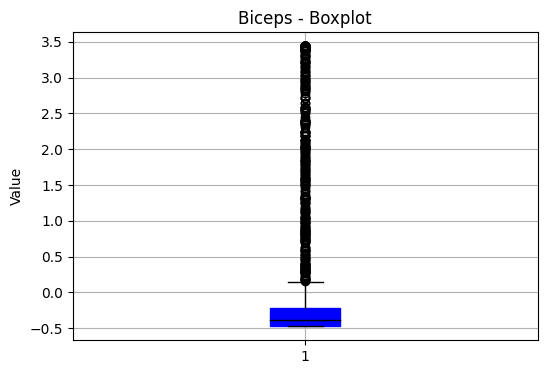

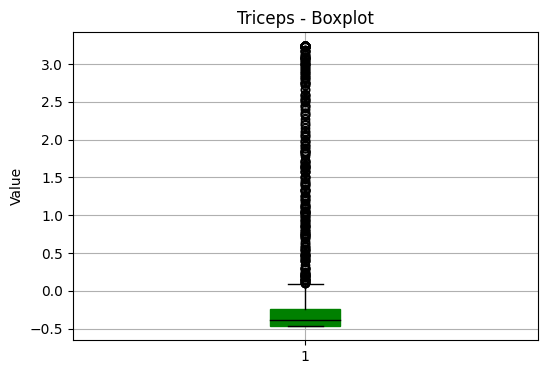

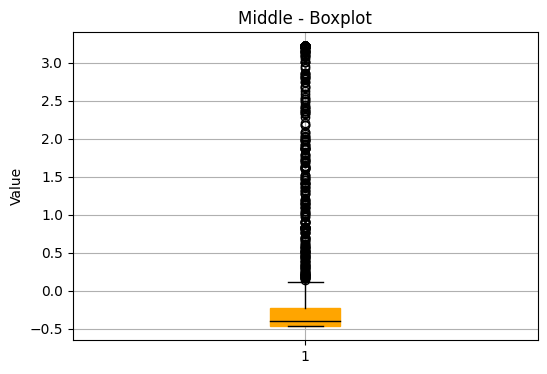

In [50]:
columns = ['biceps', 'triceps', 'middle']
colors = ['blue', 'green', 'orange']

for col, color in zip(columns, colors):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_standardized[col].dropna(), patch_artist=True,
                boxprops=dict(facecolor=color, color=color),
                medianprops=dict(color='black'))
    plt.title(f'{col.capitalize()} - Boxplot')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


In [51]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler

numeric_cols = df_standardized.select_dtypes(include=['number']).columns.tolist()
lower = df[numeric_cols].quantile(0.01)
upper = df[numeric_cols].quantile(0.99)
df_wins = df[numeric_cols].clip(lower=lower, upper=upper, axis=1)
pt = PowerTransformer(method='yeo-johnson')
df_pt = pd.DataFrame(
    pt.fit_transform(df_wins),
    columns=numeric_cols,
    index=df.index
)
others = df.drop(columns=numeric_cols)
df_final = pd.concat([df_pt, others], axis=1)
numeric_cols = df_final.select_dtypes(include=['number']).columns.tolist()


if not numeric_cols:
    raise ValueError("لا توجد أعمدة رقمية في DataFrame.")


for col in numeric_cols:

    p5 = df_final[col].quantile(0.05, interpolation='lower')  #  5%
    p95 = df_final[col].quantile(0.95, interpolation='higher')  #  95%
    
    df_final[col] = df_final[col].clip(lower=p5, upper=p95, axis=0)



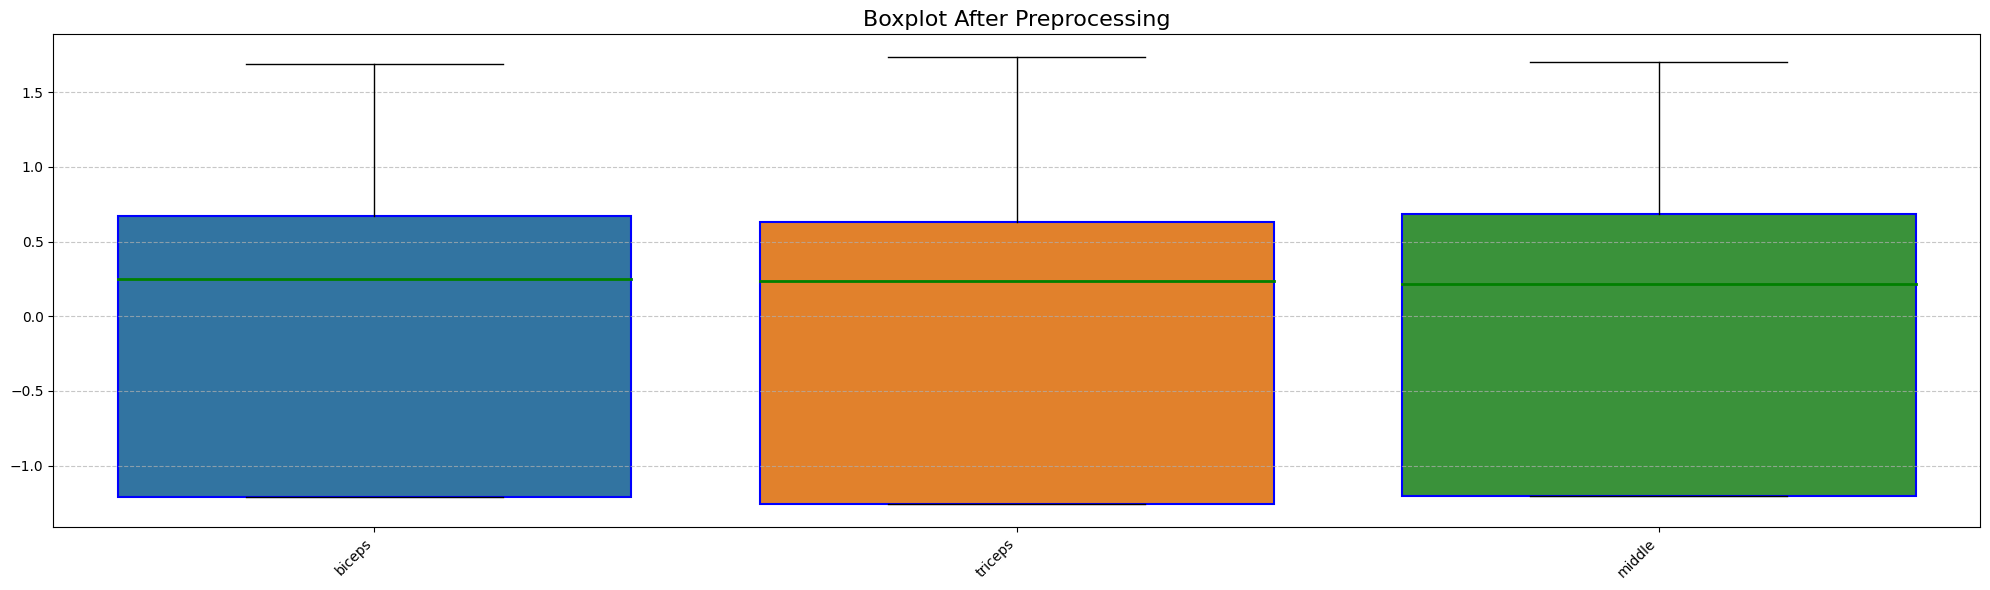

In [52]:

plt.figure(figsize=(20, 6))
sns.boxplot(
    data=df_final,  
    showfliers=True,      
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.4),
    boxprops=dict(edgecolor='blue', linewidth=1.5),
    whiskerprops=dict(color='black', linewidth=1),
    capprops=dict(color='black', linewidth=1),
    medianprops=dict(color='green', linewidth=2)
)

plt.title('Boxplot After Preprocessing', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [53]:
df_final.shape

(2486, 4)

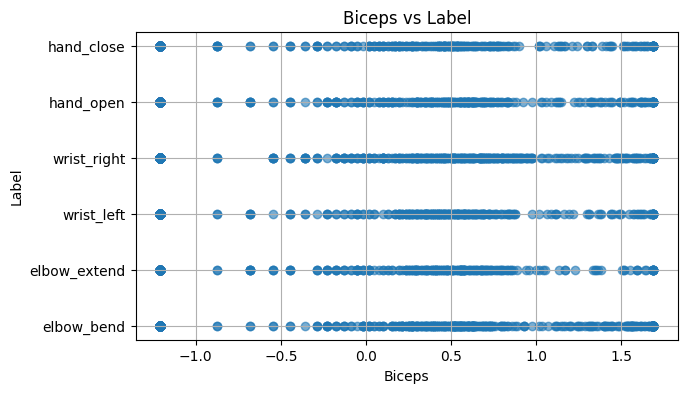

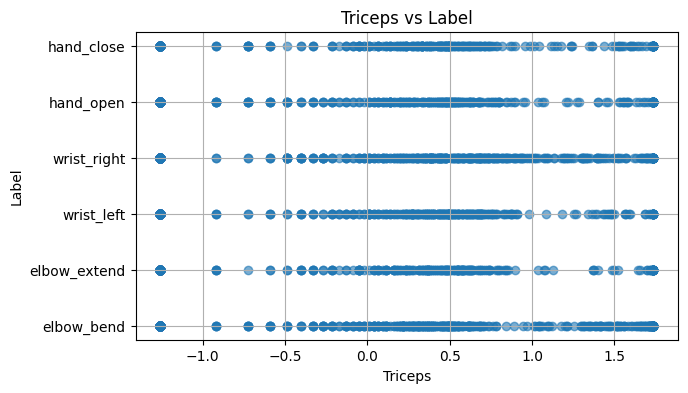

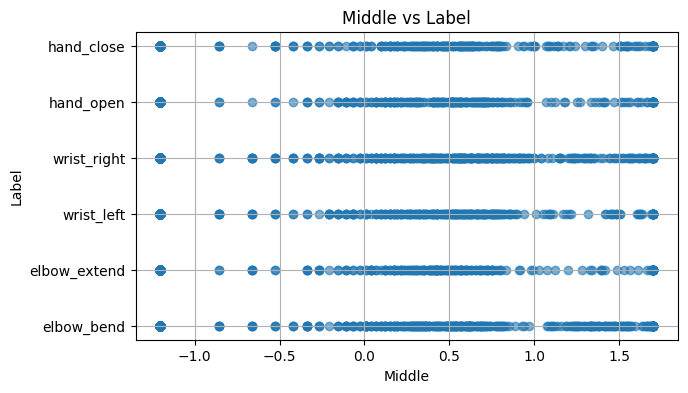

In [54]:
import matplotlib.pyplot as plt

columns = ['biceps', 'triceps', 'middle']
target = 'label'

for col in columns:
    plt.figure(figsize=(7, 4))
    plt.scatter(df_final[col], df_final[target], alpha=0.6)
    plt.title(f'{col.capitalize()} vs {target.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel(target.capitalize())
    plt.grid(True)
    plt.show()


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_final['label'] = le.fit_transform(df_final['label'])



In [56]:
df_final

,biceps,triceps,middle,label
0,1.688208,1.736851,1.701294,0
1,-1.208312,-1.258870,-1.203055,0
4,1.688208,1.418307,0.686946,0
5,-1.208312,-1.258870,0.710416,0
6,-1.208312,-0.019528,0.288192,0
...,...,...,...,...
11579,1.653679,1.689715,1.621036,2
11581,1.611925,1.560128,1.506209,2
11587,1.147573,1.593815,1.701294,2
11588,1.571226,1.648448,1.654313,2


In [57]:
df_final.corr()['label']

biceps    -0.056996
triceps   -0.004342
middle     0.028629
label      1.000000
Name: label, dtype: float64

In [58]:
df_final.to_csv('preprosesseddata.csv')

In [70]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

y = to_categorical(df_final['label'], num_classes=len(np.unique(df_final['label'])))

X = df_final[['biceps', 'triceps', 'middle']].values  # اختر الأعمدة التي تحتوي على الميزات

SEQ_LEN = 10
X_seq, y_seq = [], []

for i in range(len(X) - SEQ_LEN):
    X_seq.append(X[i:i+SEQ_LEN])
    y_seq.append(y[i+SEQ_LEN])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print("X_seq shape:", X_seq.shape)
print("y_seq shape:", y_seq.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq,
    test_size=0.2,
    random_state=42,
    stratify=y_seq  
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(SEQ_LEN, 3)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))

model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(len(np.unique(df_final['label'])), activation='softmax'))

model.compile(
optimizer=Adam(learning_rate=0.0005, clipnorm=1.0),
loss='categorical_crossentropy',
metrics=['accuracy']
)

model.summary()

class StopAt97Accuracy(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.97:
            print("\nValidation accuracy reached 97%, stopping training.")
            self.model.stop_training = True

# Create the callback
stop_at_97 = StopAt97Accuracy()
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=32,
    callbacks=[stop_at_97]
)

model.save('model.h5')

X_seq shape: (2476, 10, 3)
y_seq shape: (2476, 6)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 8, 64)               │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 4, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 4, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,670 (600.27 KB)

 Trainable params: 153,542 (599.77 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.1742 - loss: 2.0416 - val_accuracy: 0.2359 - val_loss: 1.7776
Epoch 2/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2435 - loss: 1.7937 - val_accuracy: 0.2702 - val_loss: 1.7644
Epoch 3/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2730 - loss: 1.7399 - val_accuracy: 0.3044 - val_loss: 1.7546
Epoch 4/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3124 - loss: 1.6556 - val_accuracy: 0.3044 - val_loss: 1.7397
Epoch 5/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3319 - loss: 1.6567 - val_accuracy: 0.3488 - val_loss: 1.7249
Epoch 6/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3334 - loss: 1.6224 - val_accuracy: 0.3710 - val_loss: 1.6808
Epoch 7/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3391 - loss: 1.5942 - val_accuracy: 0.4073 - val_loss: 1.6348
Epoch 8/300
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3612 - loss: 1.5823 - val_accuracy: 0.

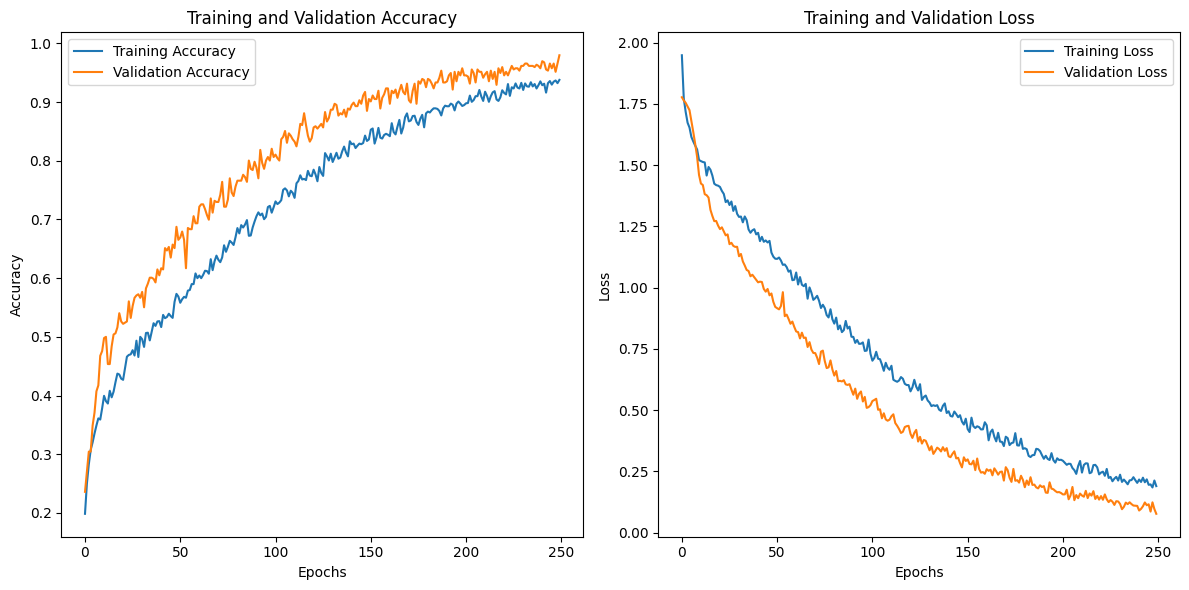

In [71]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
